In [1]:
import orchest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,confusion_matrix

/opt/conda/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Matplotlib is building the font cache; this may take a moment.


In [2]:
data = orchest.get_inputs()
lgbm, pred_lgbm, X_train, y_train, X_test, y_test = data["lgbm"]
cat, pred_cat = data["catboost"]
nb, pred_nb = data["nb"]
rf, pred_rf = data["rf"]

In [3]:
total_score=[]

## LGBM

In [4]:
lgbm_roc = roc_auc_score(y_test, pred_lgbm)
lgbm_score = accuracy_score(y_test, pred_lgbm)
print("LGBM AUC score:", lgbm_roc)
print("LGBM Accuracy Score:",lgbm_score)
total_score.append(['LGBM',lgbm_roc,lgbm_score])

LGBM AUC score: 0.9258663923143928
LGBM Accuracy Score: 0.9252005663048608


Text(68.09375, 0.5, 'Actual')

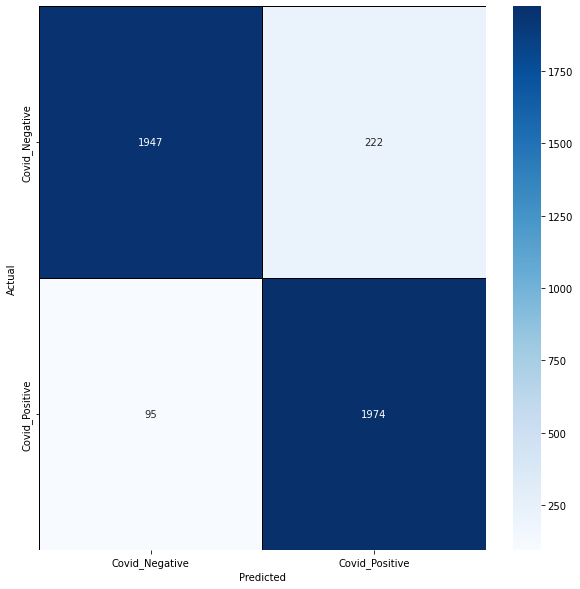

In [5]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, pred_lgbm)
sns.heatmap(
    cm,
    cmap="Blues",
    linecolor="black",
    linewidth=1,
    annot=True,
    fmt="",
    xticklabels=["Covid_Negative", "Covid_Positive"],
    yticklabels=["Covid_Negative", "Covid_Positive"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Catboost

In [6]:
cat_roc = roc_auc_score(y_test, pred_cat)
cat_score = accuracy_score(y_test, pred_cat)
print("Catboost AUC score:", cat_roc)
print("Catboost Accuracy Score:",cat_score)
total_score.append(['Catboost',cat_roc,cat_score])

Catboost AUC score: 0.9169506119111939
Catboost Accuracy Score: 0.9162340726757905


Text(68.09375, 0.5, 'Actual')

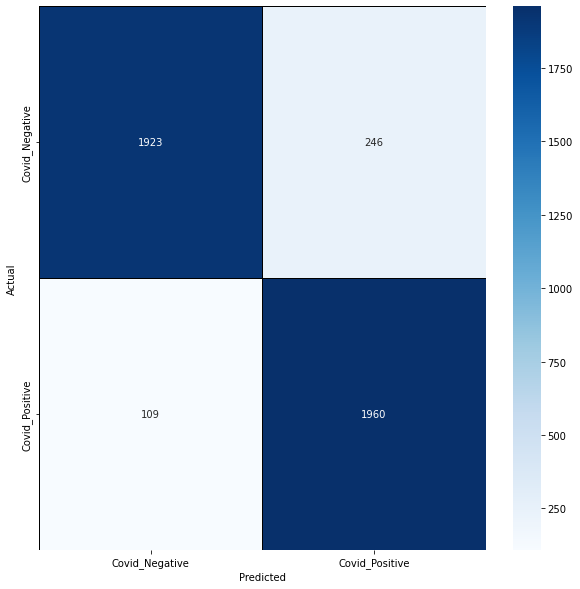

In [7]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, pred_cat)
sns.heatmap(
    cm,
    cmap="Blues",
    linecolor="black",
    linewidth=1,
    annot=True,
    fmt="",
    xticklabels=["Covid_Negative", "Covid_Positive"],
    yticklabels=["Covid_Negative", "Covid_Positive"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Naive Baise

In [8]:
nb_roc = roc_auc_score(y_test, pred_nb)
nb_score = accuracy_score(y_test, pred_nb)
print("Naive Bayes AUC score:", nb_roc)
print("Naive Bayes Accuracy Score:",nb_score)
total_score.append(['Naive Bayes',nb_roc,nb_score])

Naive Bayes AUC score: 0.6041902452079156
Naive Bayes Accuracy Score: 0.6035865974516281


Text(68.09375, 0.5, 'Actual')

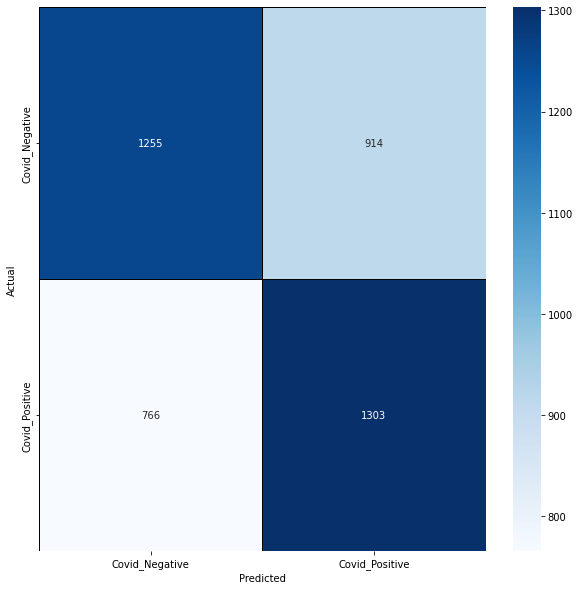

In [9]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, pred_nb)
sns.heatmap(
    cm,
    cmap="Blues",
    linecolor="black",
    linewidth=1,
    annot=True,
    fmt="",
    xticklabels=["Covid_Negative", "Covid_Positive"],
    yticklabels=["Covid_Negative", "Covid_Positive"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Random Forest

In [10]:
rf_roc = roc_auc_score(y_test, pred_rf)
rf_score = accuracy_score(y_test, pred_rf)
print("Random Forest AUC score:", rf_roc)
print("Random Forest Accuracy Score:",rf_score)
total_score.append(['Random Forest',rf_roc,rf_score])

Random Forest AUC score: 0.9323132919353756
Random Forest Accuracy Score: 0.931571495988674


Text(68.09375, 0.5, 'Actual')

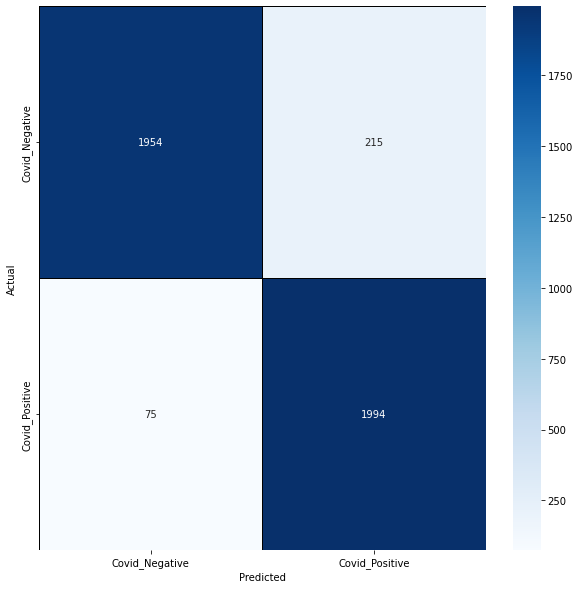

In [11]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(
    cm,
    cmap="Blues",
    linecolor="black",
    linewidth=1,
    annot=True,
    fmt="",
    xticklabels=["Covid_Negative", "Covid_Positive"],
    yticklabels=["Covid_Negative", "Covid_Positive"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [12]:
orchest.output(total_score,name='eval')